# Time Series

#### TASK
For each of the above given dataset
1. Create train-test data from given datasets.
2. Select important features and create additional features from the given features.
3. Plot graphs for different variables with time on X-axis and variable on Y-axis.
4. Create and train LinearRegression, PolynomialRegression (with three different number of
polynomial features) and ANN model for both datasets.
5. Plot graphs showing the result for all the models.
6. Compare RMSE, MAE, MSE for the created models.
7. Compare the results and justify which one is better.
8. Try the above tasks taking different features.

In [ ]:
# Libraries:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Monthly Ocean:

In [ ]:
ocean_df = pd.read_csv('monthly_ocean.csv')
ocean_df

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292
...,...,...,...
3283,GISTEMP,1880-03-06,-0.1800
3284,GCAG,1880-02-06,-0.1229
3285,GISTEMP,1880-02-06,-0.2100
3286,GCAG,1880-01-06,0.0009


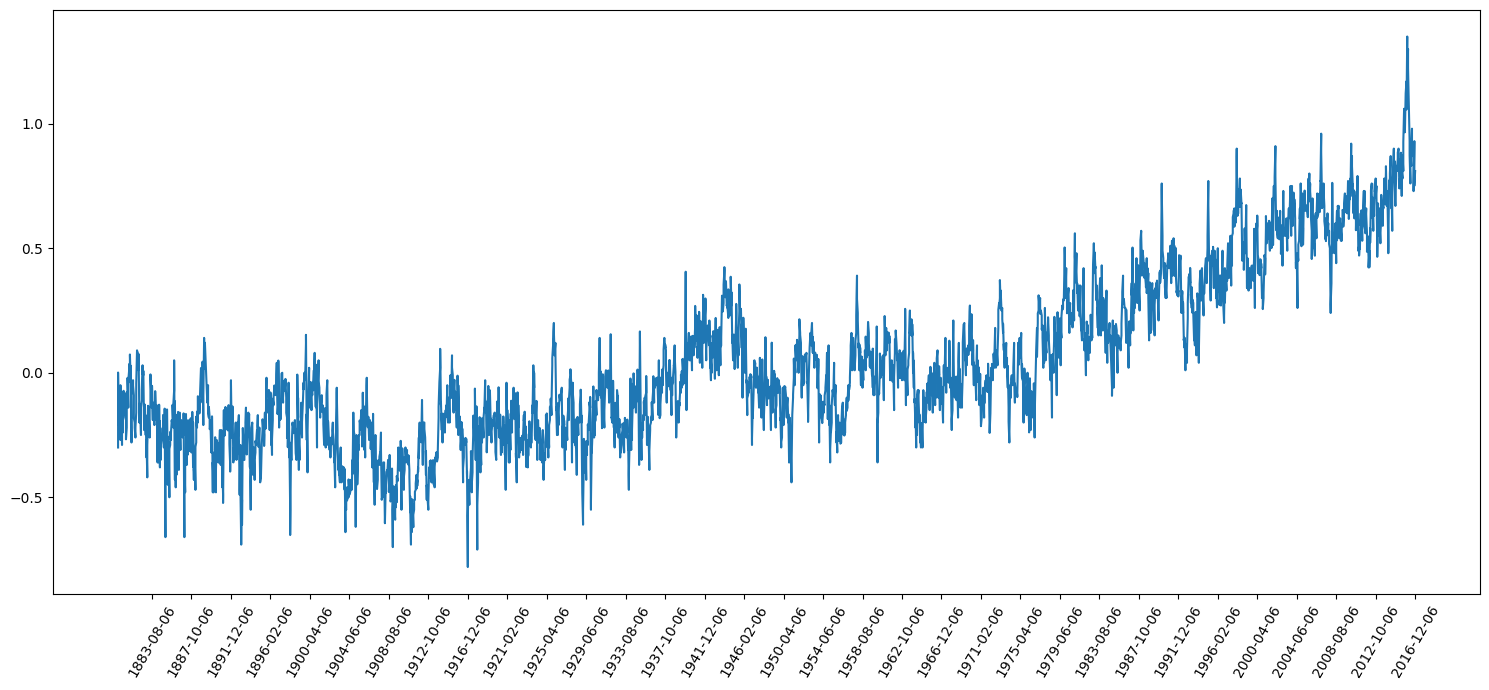

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(ocean_df['Date'][::-1], ocean_df['Mean'][::-1])
plt.xticks([i for i in list(ocean_df['Date'])[::100]][::-1], rotation=60)
plt.tight_layout()
plt.show()

In [ ]:
# Adding features:
ocean_df['lag_1'] = ocean_df['Mean'].shift(1)
ocean_df.dropna(inplace=True)
ocean_df

,Source,Date,Mean,lag_1
1,GISTEMP,2016-12-06,0.8100,0.7895
2,GCAG,2016-11-06,0.7504,0.8100
3,GISTEMP,2016-11-06,0.9300,0.7504
4,GCAG,2016-10-06,0.7292,0.9300
5,GISTEMP,2016-10-06,0.8900,0.7292
...,...,...,...,...
3283,GISTEMP,1880-03-06,-0.1800,-0.1357
3284,GCAG,1880-02-06,-0.1229,-0.1800
3285,GISTEMP,1880-02-06,-0.2100,-0.1229
3286,GCAG,1880-01-06,0.0009,-0.2100


In [ ]:
X_train = np.array(ocean_df['lag_1'][:-900]).reshape(-1,1)
y_train = np.array(ocean_df['Mean'][:-900]).reshape(-1,1)
X_test = np.array(ocean_df['lag_1'][-900:]).reshape(-1,1)
y_test = np.array(ocean_df['Mean'][-900:]).reshape(-1,1)


print(f'''
X_train : {X_train.shape}
y_train : {y_train.shape}
X_test : {X_test.shape}
y_test : {y_test.shape}
''')


X_train : (2387, 1)
y_train : (2387, 1)
X_test : (900, 1)
y_test : (900, 1)



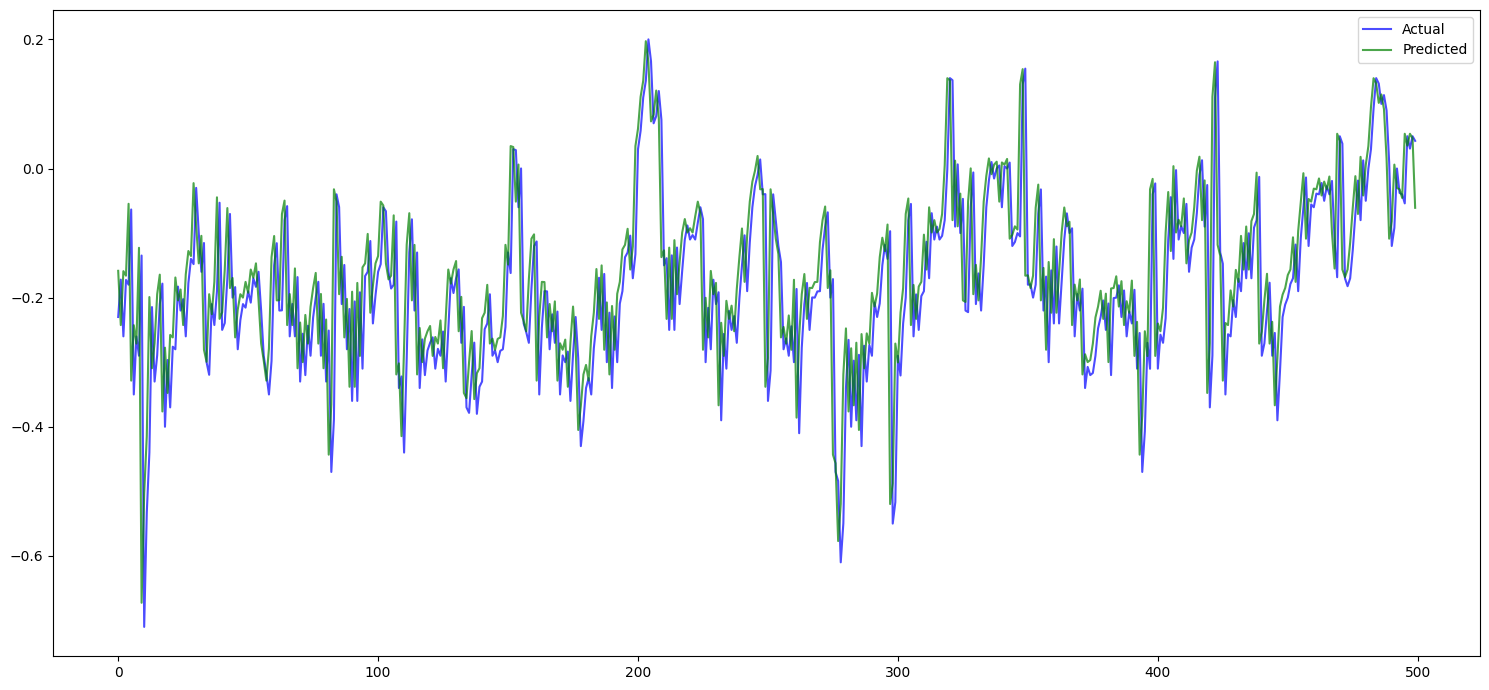

In [ ]:
# Linear Regression:

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_y_train_pred = lr.predict(X_train)

plt.figure(figsize=(15,7))
plt.plot(y_train[::-1][:500], color='blue', alpha=0.7,  label='Actual')
plt.plot(lr_y_train_pred[::-1][:500], color='green', alpha=0.7, label='Predicted')
plt.legend()
plt.tight_layout()
plt.show()

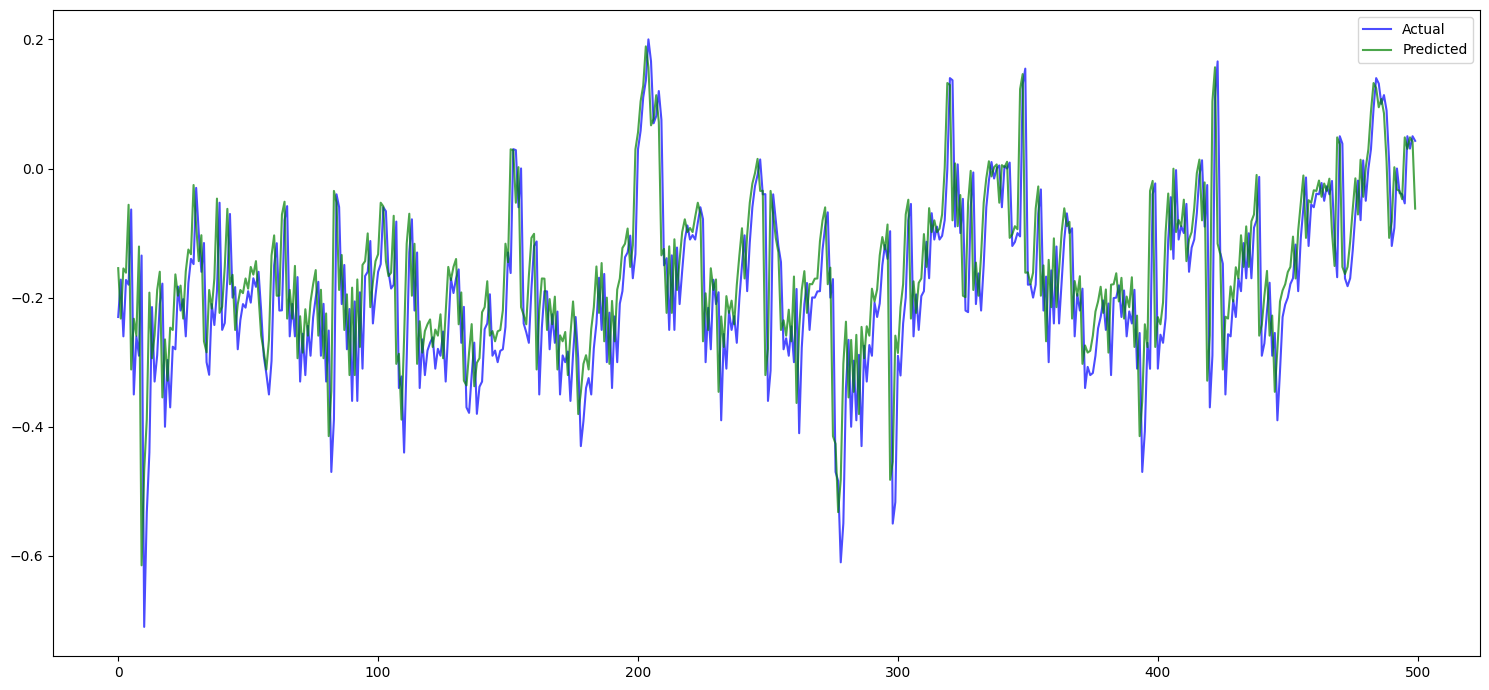

In [ ]:
# Polynomial Linear Regression
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)

poly_lr_y_train_pred = poly_lr.predict(X_train_poly)

plt.figure(figsize=(15,7))
plt.plot(y_train[::-1][:500], color='blue', alpha=0.7,  label='Actual')
plt.plot(poly_lr_y_train_pred[::-1][:500], color='green', alpha=0.7, label='Predicted')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# ANN Model

ann = tf.keras.Sequential([
    tf.keras.layers.Dense(8, input_shape=(1,), name='Input'),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1, name='Output')
])

ann.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mse"])

ann_log = ann.fit(X_train, y_train, epochs=10, batch_size=50, validation_data=(X_test, y_test))

Epoch 1/10
48/48 [==============================] - 1s 5ms/step - loss: 0.1372 - mse: 0.0315 - val_loss: 0.1148 - val_mse: 0.0190
Epoch 2/10
48/48 [==============================] - 0s 3ms/step - loss: 0.0785 - mse: 0.0105 - val_loss: 0.0769 - val_mse: 0.0115
Epoch 3/10
48/48 [==============================] - 0s 3ms/step - loss: 0.0703 - mse: 0.0092 - val_loss: 0.0764 - val_mse: 0.0112
Epoch 4/10
48/48 [==============================] - 0s 2ms/step - loss: 0.0702 - mse: 0.0091 - val_loss: 0.0765 - val_mse: 0.0113
Epoch 5/10
48/48 [==============================] - 0s 3ms/step - loss: 0.0700 - mse: 0.0091 - val_loss: 0.0760 - val_mse: 0.0111
Epoch 6/10
48/48 [==============================] - 0s 2ms/step - loss: 0.0701 - mse: 0.0091 - val_loss: 0.0765 - val_mse: 0.0113
Epoch 7/10
48/48 [==============================] - 0s 2ms/step - loss: 0.0699 - mse: 0.0090 - val_loss: 0.0764 - val_mse: 0.0113
Epoch 8/10
48/48 [==============================] - 0s 2ms/step - loss: 0.0700 - mse: 0.00

75/75 [==============================] - 0s 1ms/step


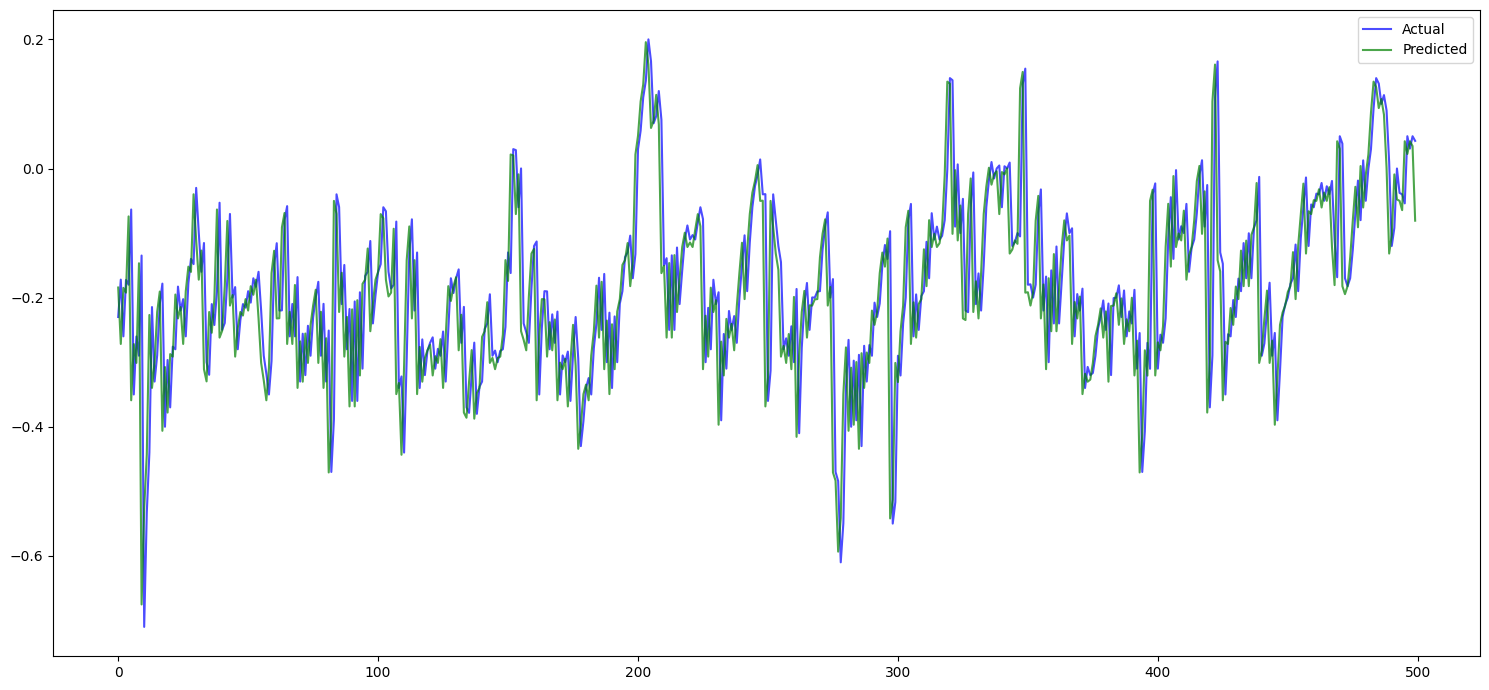

In [ ]:
ann_y_train_pred = ann.predict(X_train)

plt.figure(figsize=(15,7))
plt.plot(y_train[::-1][:500], color='blue', alpha=0.7,  label='Actual')
plt.plot(ann_y_train_pred[::-1][:500], color='green', alpha=0.7, label='Predicted')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Predicting Test Values:
lr_y_pred = lr.predict(X_test)
poly_lr_y_pred = poly_lr.predict(X_test_poly)
ann_y_train_pred = ann.predict(X_train)
ann_y_pred = ann.predict(X_test)

29/29 [==============================] - 0s 1ms/step


In [ ]:
# Calculate RMSE, MSE, MAE

#Linear Regression
lr_train_rmse = np.sqrt(mean_squared_error(lr_y_train_pred, y_train))
lr_train_mae = mean_absolute_error(lr_y_train_pred, y_train)
lr_train_mse = mean_squared_error(lr_y_train_pred, y_train)
lr_test_rmse = np.sqrt(mean_squared_error(lr_y_pred, y_test))
lr_test_mae = mean_absolute_error(lr_y_pred, y_test)
lr_test_mse = mean_squared_error(lr_y_pred, y_test)


#Polynomial Regression
poly_lr_train_rmse = np.sqrt(mean_squared_error(poly_lr_y_train_pred, y_train))
poly_lr_train_mae = mean_absolute_error(poly_lr_y_train_pred, y_train)
poly_lr_train_mse = mean_squared_error(poly_lr_y_train_pred, y_train)
poly_lr_test_rmse = np.sqrt(mean_squared_error(poly_lr_y_pred, y_test))
poly_lr_test_mae = mean_absolute_error(poly_lr_y_pred, y_test)
poly_lr_test_mse = mean_squared_error(poly_lr_y_pred, y_test)


#ANN
ann_train_rmse = np.sqrt(mean_squared_error(ann_y_train_pred, y_train))
ann_train_mae = mean_absolute_error(ann_y_train_pred, y_train)
ann_train_mse = mean_squared_error(ann_y_train_pred, y_train)
ann_test_rmse = np.sqrt(mean_squared_error(ann_y_pred, y_test))
ann_test_mae = mean_absolute_error(ann_y_pred, y_test)
ann_test_mse = mean_squared_error(ann_y_pred, y_test)

In [ ]:
metrics_dict = {
    'Model': ['Linear Regression', 'Polynomial Regression', 'ANN'],
    'Train RMSE': [lr_train_rmse, poly_lr_train_rmse, ann_train_rmse],
    'Test RMSE': [lr_test_rmse, poly_lr_test_rmse, ann_test_rmse],
    'Train MAE': [lr_train_mae, poly_lr_train_mae, ann_train_mae],
    'Test MAE': [lr_test_mae, poly_lr_test_mae, ann_test_mae],
    'Train MSE': [lr_train_mse, poly_lr_train_mse, ann_train_mse],
    'Test MSE': [lr_test_mse, poly_lr_test_mse, ann_test_mse]
}

metrics_df = pd.DataFrame(metrics_dict)

metrics_df

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MSE,Test MSE
0,Linear Regression,0.093208,0.106304,0.070162,0.078733,0.008688,0.011300
1,Polynomial Regression,0.092794,0.105950,0.069889,0.080468,0.008611,0.011225
2,ANN,0.095028,0.105632,0.069728,0.076102,0.009030,0.011158


Comparing the above metrics, all the 3 models give similar results. So it is tough to tell which one is better.

### Electricity Load Forecasting:

In [ ]:
load_df = pd.read_csv('Electricity_load_forecasting.csv', index_col=[0], parse_dates=[0])

load_df

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
03-01-2015 1:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
03-01-2015 2:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
03-01-2015 3:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
03-01-2015 4:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
03-01-2015 5:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31-12-2019 19:00,1301.6065,26.635645,0.018421,0.013165,13.184052,25.135645,0.018048,0.064240,3.086798,23.620020,0.016697,0.073425,3.865351,22,1,0
31-12-2019 20:00,1250.9634,26.495935,0.018162,0.014713,13.443892,24.769373,0.017781,0.058838,3.659980,23.284998,0.016606,0.064362,4.171572,22,1,0
31-12-2019 21:00,1193.6802,26.354456,0.017980,0.013836,13.442195,24.479456,0.017606,0.038086,3.769294,23.041956,0.016492,0.054260,4.045283,22,1,0


In [ ]:
load_df['lag_1'] = load_df['nat_demand'].shift(1)
load_df.dropna(inplace=True)
load_df

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school,lag_1
datetime,,,,,,,,,,,,,,,,,
03-01-2015 2:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0,970.3450
03-01-2015 3:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0,912.1755
03-01-2015 4:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0,900.2688
03-01-2015 5:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0,889.9538
03-01-2015 6:00,879.2323,26.034143,0.019080,0.014542,20.062038,22.995081,0.017028,0.001485,9.087273,22.456018,0.016410,0.061539,5.280351,0,0,0,893.6865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31-12-2019 19:00,1301.6065,26.635645,0.018421,0.013165,13.184052,25.135645,0.018048,0.064240,3.086798,23.620020,0.016697,0.073425,3.865351,22,1,0,1287.3592
31-12-2019 20:00,1250.9634,26.495935,0.018162,0.014713,13.443892,24.769373,0.017781,0.058838,3.659980,23.284998,0.016606,0.064362,4.171572,22,1,0,1301.6065
31-12-2019 21:00,1193.6802,26.354456,0.017980,0.013836,13.442195,24.479456,0.017606,0.038086,3.769294,23.041956,0.016492,0.054260,4.045283,22,1,0,1250.9634


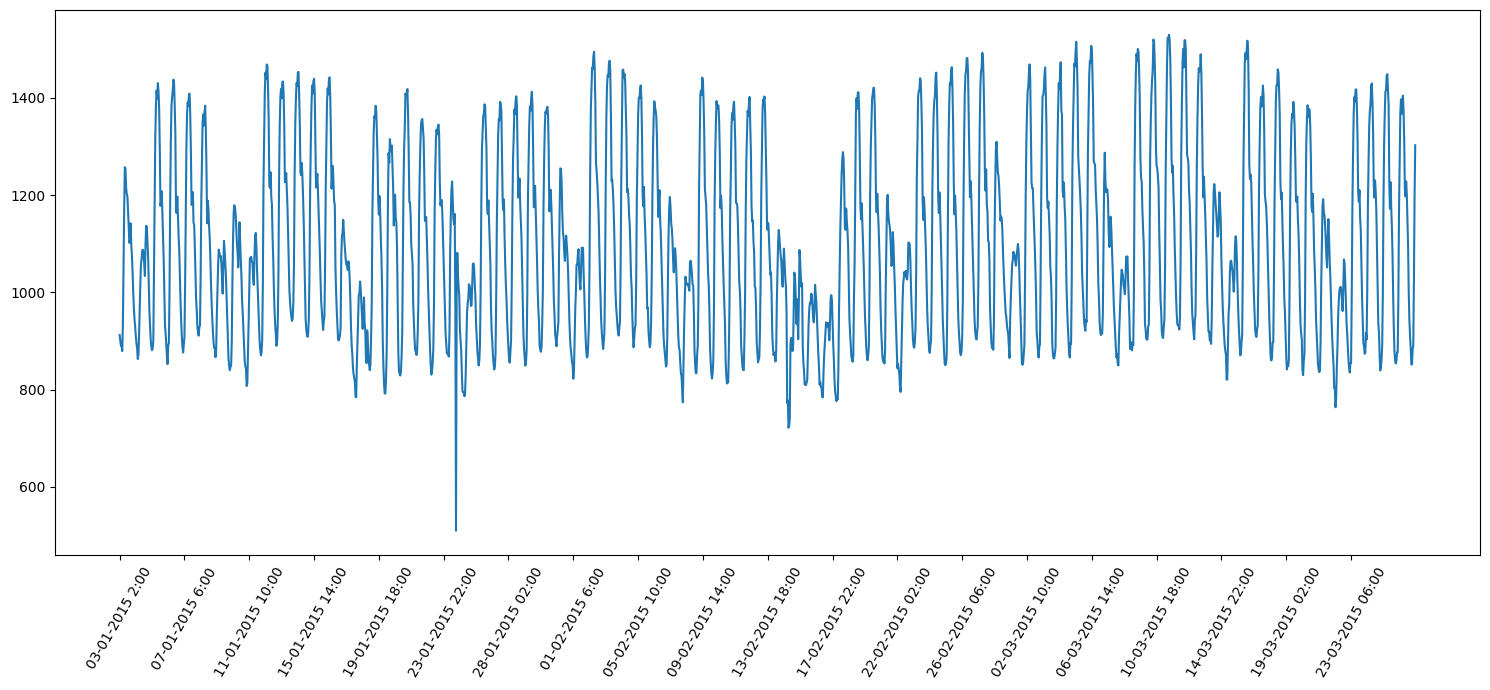

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(load_df.index[:2000], load_df['nat_demand'][:2000])
plt.xticks([i for i in list(load_df.index)[:2000][::100]], rotation=60)
plt.tight_layout()
plt.show()

In [ ]:
X = load_df.drop(columns=['nat_demand'])
y = load_df['nat_demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

print(f'''
X_train : {X_train.shape}
y_train : {y_train.shape}
X_test : {X_test.shape}
y_test : {y_test.shape}
''')


X_train : (35019, 16)
y_train : (35019, 1)
X_test : (8755, 16)
y_test : (8755, 1)



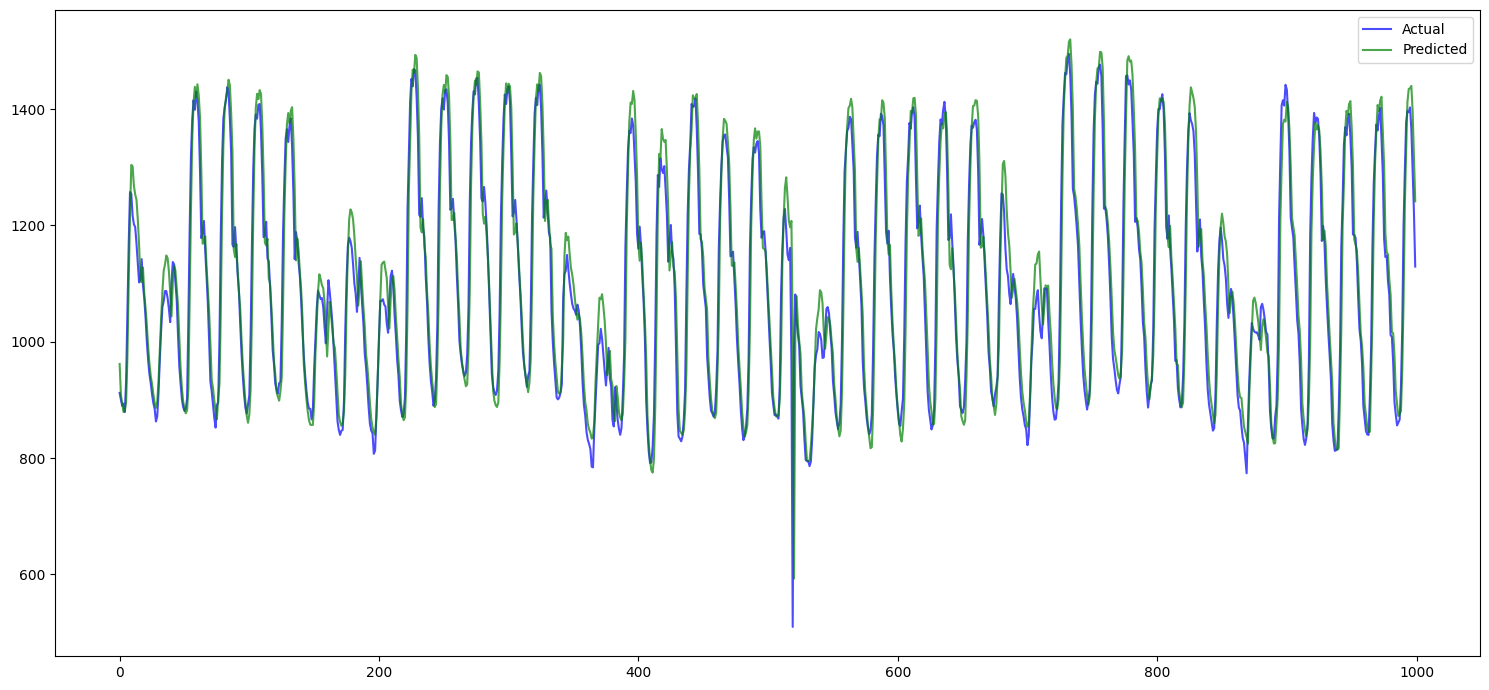

In [ ]:
# Multiple Linear Regression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

mlr_y_train_pred = mlr.predict(X_train)

plt.figure(figsize=(15,7))
plt.plot(y_train[:1000], color='blue', alpha=0.7,  label='Actual')
plt.plot(mlr_y_train_pred[:1000], color='green', alpha=0.7, label='Predicted')
plt.legend()
plt.tight_layout()
plt.show()


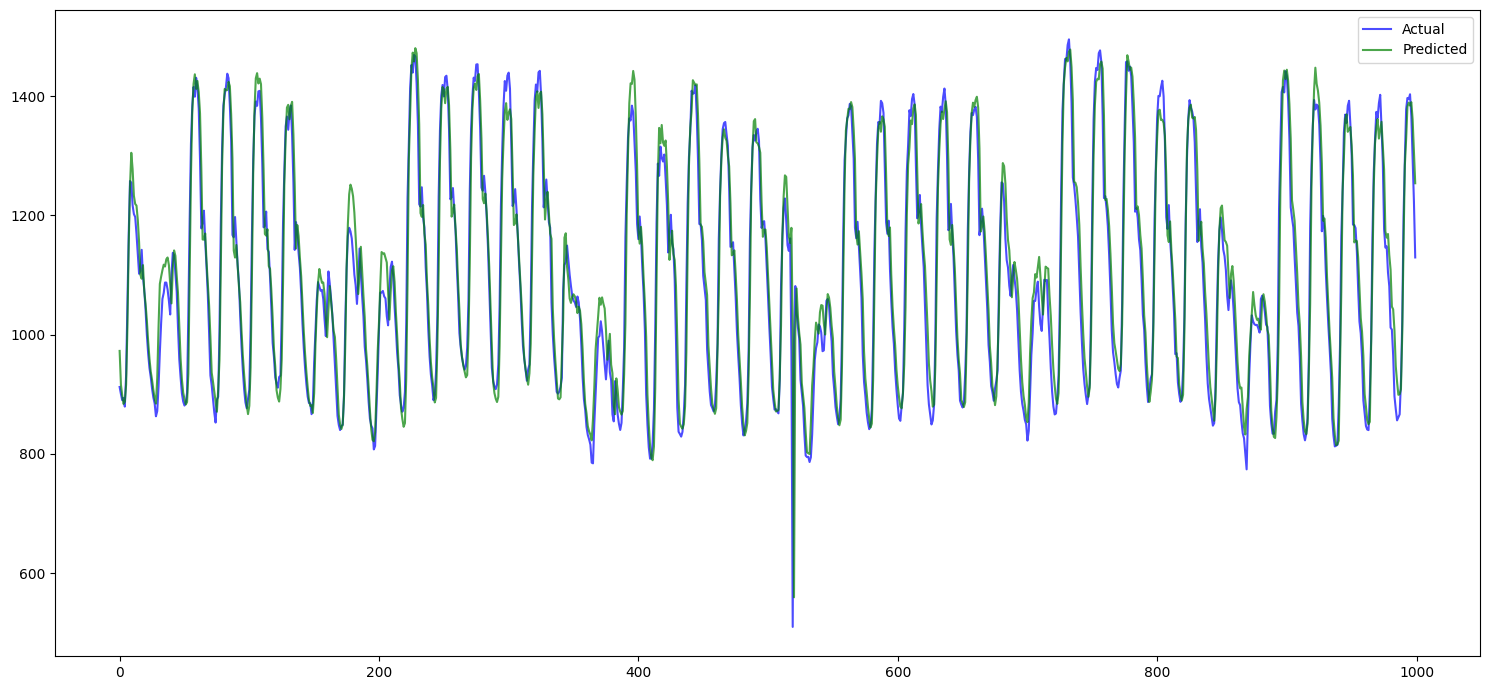

In [ ]:
# Polynomial Regression

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

poly_mlr = LinearRegression()
poly_mlr.fit(X_train_poly, y_train)

poly_mlr_y_train_pred = poly_mlr.predict(X_train_poly)

plt.figure(figsize=(15,7))
plt.plot(y_train[:1000], color='blue', alpha=0.7,  label='Actual')
plt.plot(poly_mlr_y_train_pred[:1000], color='green', alpha=0.7, label='Predicted')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# ANN Model

ann = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(16,), name='Input'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, name='Output')
])

ann.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mse"])

ann_log = ann.fit(X_train, y_train, epochs=10, batch_size=350, validation_data=(X_test, y_test))

Epoch 1/10
101/101 [==============================] - 4s 19ms/step - loss: 823.0666 - mse: 840826.4375 - val_loss: 479.4010 - val_mse: 237412.1406
Epoch 2/10
101/101 [==============================] - 2s 17ms/step - loss: 177.1993 - mse: 59807.9297 - val_loss: 74.4556 - val_mse: 11038.3789
Epoch 3/10
101/101 [==============================] - 2s 18ms/step - loss: 110.9724 - mse: 19719.2949 - val_loss: 97.8936 - val_mse: 16213.0127
Epoch 4/10
101/101 [==============================] - 2s 17ms/step - loss: 105.7654 - mse: 18004.8418 - val_loss: 131.6954 - val_mse: 26288.6035
Epoch 5/10
101/101 [==============================] - 1s 14ms/step - loss: 103.5947 - mse: 17306.2129 - val_loss: 265.1362 - val_mse: 112856.0391
Epoch 6/10
101/101 [==============================] - 1s 11ms/step - loss: 102.1867 - mse: 16744.9648 - val_loss: 90.7187 - val_mse: 13626.1006
Epoch 7/10
101/101 [==============================] - 1s 11ms/step - loss: 99.5411 - mse: 15825.8135 - val_loss: 84.2339 - val_mse

1095/1095 [==============================] - 3s 3ms/step


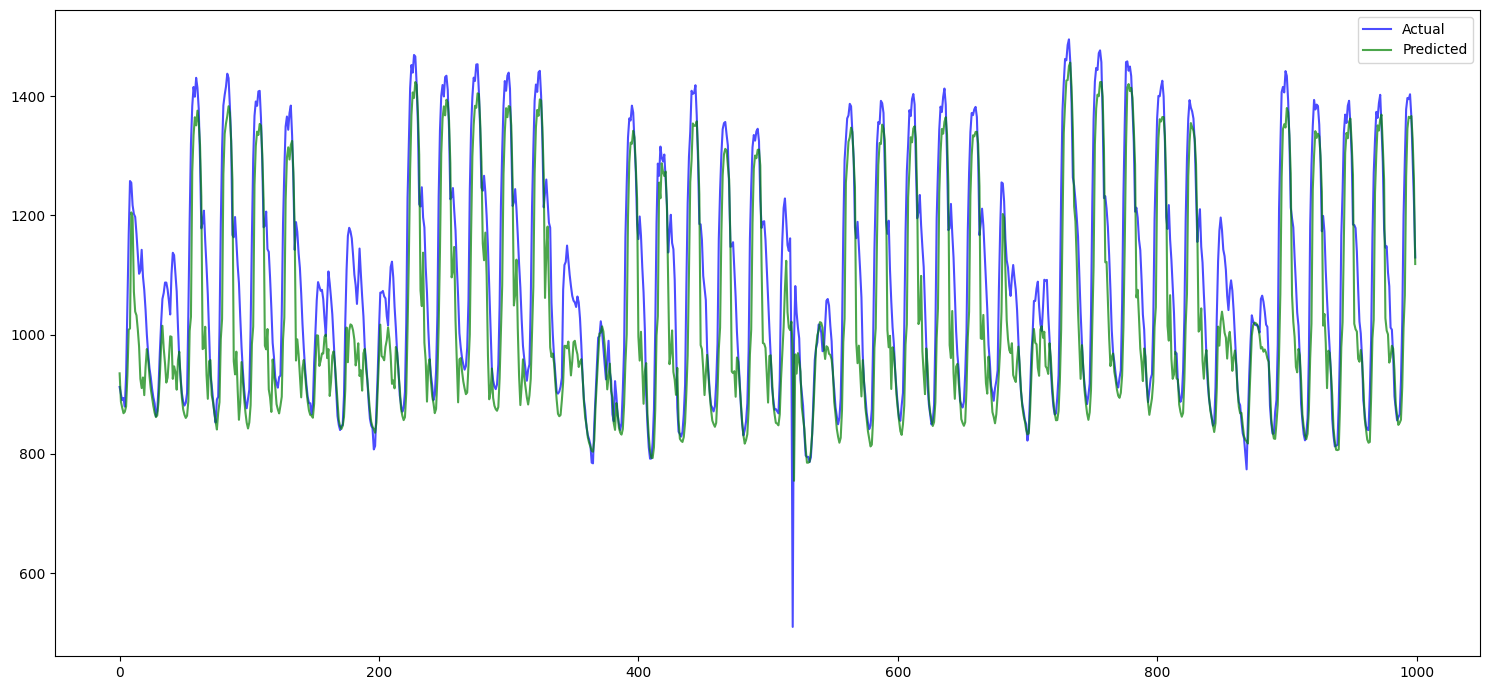

In [ ]:
ann_y_train_pred = ann.predict(X_train)

plt.figure(figsize=(15,7))
plt.plot(y_train[:1000], color='blue', alpha=0.7,  label='Actual')
plt.plot(ann_y_train_pred[:1000], color='green', alpha=0.7, label='Predicted')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Predicting Test Values:
mlr_y_pred = mlr.predict(X_test)
poly_mlr_y_pred = poly_mlr.predict(X_test_poly)
ann_y_pred = ann.predict(X_test)

274/274 [==============================] - 1s 3ms/step


In [ ]:
# Calculate RMSE, MSE, MAE

#Multiple Linear Regression
mlr_train_rmse = np.sqrt(mean_squared_error(mlr_y_train_pred, y_train))
mlr_train_mae = mean_absolute_error(mlr_y_train_pred, y_train)
mlr_train_mse = mean_squared_error(mlr_y_train_pred, y_train)
mlr_test_rmse = np.sqrt(mean_squared_error(mlr_y_pred, y_test))
mlr_test_mae = mean_absolute_error(mlr_y_pred, y_test)
mlr_test_mse = mean_squared_error(mlr_y_pred, y_test)


#Polynomial Regression
poly_mlr_train_rmse = np.sqrt(mean_squared_error(poly_mlr_y_train_pred, y_train))
poly_mlr_train_mae = mean_absolute_error(poly_mlr_y_train_pred, y_train)
poly_mlr_train_mse = mean_squared_error(poly_mlr_y_train_pred, y_train)
poly_mlr_test_rmse = np.sqrt(mean_squared_error(poly_mlr_y_pred, y_test))
poly_mlr_test_mae = mean_absolute_error(poly_mlr_y_pred, y_test)
poly_mlr_test_mse = mean_squared_error(poly_mlr_y_pred, y_test)


#ANN
ann_train_rmse = np.sqrt(mean_squared_error(ann_y_train_pred, y_train))
ann_train_mae = mean_absolute_error(ann_y_train_pred, y_train)
ann_train_mse = mean_squared_error(ann_y_train_pred, y_train)
ann_test_rmse = np.sqrt(mean_squared_error(ann_y_pred, y_test))
ann_test_mae = mean_absolute_error(ann_y_pred, y_test)
ann_test_mse = mean_squared_error(ann_y_pred, y_test)

In [ ]:
metrics_dict = {
    'Model': ['Linear Regression', 'Polynomial Regression', 'ANN'],
    'Train RMSE': [mlr_train_rmse, poly_mlr_train_rmse, ann_train_rmse],
    'Test RMSE': [mlr_test_rmse, poly_mlr_test_rmse, ann_test_rmse],
    'Train MAE': [mlr_train_mae, poly_mlr_train_mae, ann_train_mae],
    'Test MAE': [mlr_test_mae, poly_mlr_test_mae, ann_test_mae],
    'Train MSE': [mlr_train_mse, poly_mlr_train_mse, ann_train_mse],
    'Test MSE': [mlr_test_mse, poly_mlr_test_mse, ann_test_mse]
}

metrics_df = pd.DataFrame(metrics_dict)

metrics_df

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MSE,Test MSE
0,Linear Regression,54.737275,54.398006,42.091873,40.849476,2996.169325,2959.143015
1,Polynomial Regression,49.399306,51.258884,37.747588,38.627771,2440.291400,2627.473168
2,ANN,115.272219,124.578183,87.816893,98.356760,13287.684577,15519.723643


Comparing the above metrics, Polynomial Regression of 2nd Order gives the best results, both train and test, rmse, mae and mse all are close to each other which shows model is not overfitting. Whereas in case of ANN model is clearly overfitting, and in case of Multiple linear regression model is not overfitting but it has higher rmse, mae and mse than polynomial regression model.